In [ ]:
# https://lkieliger.medium.com/deep-reinforcement-learning-in-practice-by-playing-doom-part-1-getting-started-618c99075c77

In [1]:
import gymnasium

from vizdoom import gymnasium_wrapper  # noqa

In [ ]:
def add_square_borders(image, new_dim):
    org_height, org_width = image.shape
    
    delta_h = new_dim - org_height
    delta_w = new_dim - org_width
    
    color = [0, 0, 0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    square_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)

    return square_image
    

In [ ]:
def reconstruct_frame_hadamard(noisyframe, lasso):
       
    ny, nx = noisyframe.shape
    A = hadamard(nx*ny)
    flat_frame = noisyframe.T.reshape(-1,1)
    
    idx_nonzero = np.where(flat_frame != 0)[0]
    
    # compressed sample
    b = flat_frame[idx_nonzero]
    # compression matrix @ transform matrix
    Ac = A[idx_nonzero,:]
    
    # LASSO optimization
    lasso.fit(Ac, b)
    
    # Reconstruct frame
    coeff = np.array(lasso.coef_)
    reconstructed_image = np.array(sympy.fwht(coeff)).astype(np.float32).reshape(width,height).T

    return reconstructed_image

In [2]:
trial_env = gymnasium.make("VizdoomHealthGatheringSupreme-v0", render_mode="rgb_array")

images = []
obss = []

/usr/local/lib/python3.10/dist-packages/vizdoom/gymnasium_wrapper/base_gymnasium_env.py:82: UserWarning: Detected screen format CRCGCB. Only RGB24 and GRAY8 are supported in the Gymnasium wrapper. Forcing RGB24.
  warnings.warn(


In [4]:
# Rendering random rollouts for ten episodes
for _ in range(2):
    done = False
    obs, info = trial_env.reset(seed=42)
    img = trial_env.render()
    while not done:
        images.append(img)
        obss.append(obs)
        obs, rew, terminated, truncated, info = trial_env.step(trial_env.action_space.sample())
        done = terminated or truncated

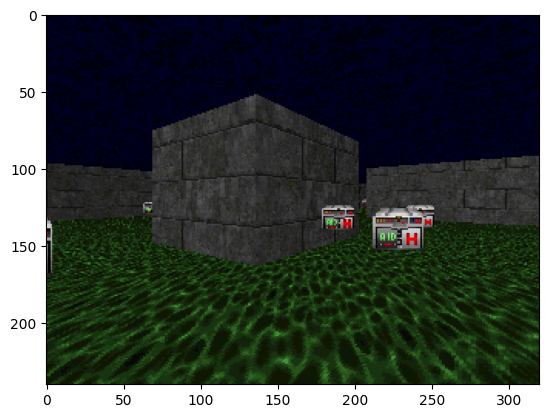

In [7]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

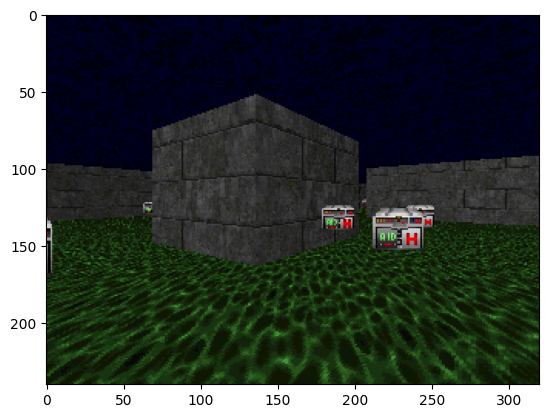

In [13]:
frame = obss[0]["screen"]
plt.imshow(frame)

In [14]:
frame.shape

(240, 320, 3)